<a href="https://colab.research.google.com/github/E2025-Arda/Deep-Learning/blob/master/keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
#df1=pd.read_csv("fake_reg.csv")

In [ ]:
#df1.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/22-Deep Learning/fake_reg.csv')

In [ ]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [ ]:
df.shape

(1000, 3)

In [ ]:
df.isnull().sum().any()

False

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


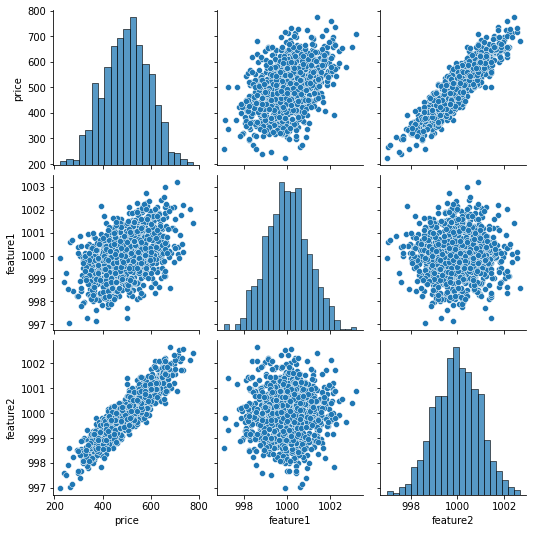

In [ ]:
sns.pairplot(df)

In [ ]:
df.corr()

,price,feature1,feature2
price,1.000000,0.444190,0.907576
feature1,0.444190,1.000000,0.030607
feature2,0.907576,0.030607,1.000000


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[["feature1", "feature2"]].values

In [ ]:
y=df["price"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
X_train.shape

(700, 2)

In [ ]:
X_train

array([[1001.63407565,  998.80950388],
       [ 999.76150137,  998.41802414],
       [ 998.2638401 , 1000.92030063],
       ...,
       [1000.47386523, 1001.44542815],
       [ 998.8625673 ,  999.15662112],
       [1000.55690247,  999.35441706]])

In [ ]:
#scaling data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler2 = MinMaxScaler()

In [ ]:
scaler2.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
X_train = scaler2.transform(X_train)

In [ ]:
X_test = scaler2.transform(X_test)

In [ ]:
X_train.min()

0.0

In [ ]:
X_train.max()

1.0

TensorFlow Syntax
(use %tensorflow_version 1.x to use old versions of tf)

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.4.0'

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense, Activation

In [ ]:
model6 = Sequential()
model6.add(Dense(4, input_dim=2, activation="relu"))           #input_dim = 2  or input_dim = X_train.shape[0]
model6.add(Dense(4, activation="relu"))
model6.add(Dense(2, activation="relu"))
model6.add(Dense(1))
model6.compile(optimizer="rmsprop", loss="mse")

In [ ]:
model6.fit(X_train, y_train, batch_size=16, epochs=250)

Epoch 1/250
44/44 [==============================] - 1s 1ms/step - loss: 257494.5694
Epoch 2/250
44/44 [==============================] - 0s 1ms/step - loss: 257232.4708
Epoch 3/250
44/44 [==============================] - 0s 1ms/step - loss: 255622.2264
Epoch 4/250
44/44 [==============================] - 0s 930us/step - loss: 253563.0931
Epoch 5/250
44/44 [==============================] - 0s 992us/step - loss: 252507.7000
Epoch 6/250
44/44 [==============================] - 0s 952us/step - loss: 253121.4479
Epoch 7/250
44/44 [==============================] - 0s 1ms/step - loss: 255040.6243
Epoch 8/250
44/44 [==============================] - 0s 1ms/step - loss: 252705.3417
Epoch 9/250
44/44 [==============================] - 0s 932us/step - loss: 254040.1417
Epoch 10/250
44/44 [==============================] - 0s 905us/step - loss: 252390.3962
Epoch 11/250
44/44 [==============================] - 0s 934us/step - loss: 253744.1622
Epoch 12/250
44/44 [==============================]

In [ ]:
model6.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_26 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 3         
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss_df=pd.DataFrame(model6.history.history)

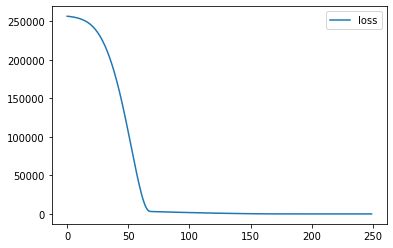

In [ ]:
loss_df.plot()

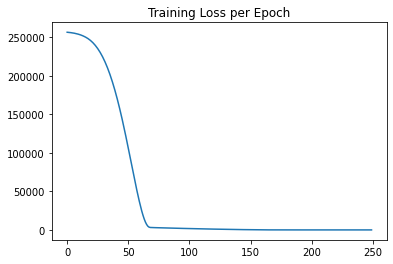

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
loss = model6.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

In [ ]:
loss_df.loss.idxmin() 

236

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [ ]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [ ]:
y_pred = model6.predict(X_test)

In [ ]:
eval_metrics(y_test, y_pred)

r2_score: 0.9971349975790853 
 mae: 4.0296127171465965 
 mse: 25.189192006166255 
 rmse: 5.018883541801529


In [ ]:
y_test.shape

(300,)

In [ ]:
y_pred.shape

(300, 1)

In [ ]:
my_dict={"Actual":y_test, "Pred":y_pred.reshape(300,)}
compare=pd.DataFrame(my_dict)

In [ ]:
compare.sample(5)

,Actual,Pred
288,449.458484,449.628784
174,549.847620,549.997986
131,420.766213,423.987885
273,375.959380,381.969147
226,603.887577,606.049194
